# Context Managers

- to ables you to run code in a contex
- example 
```python 
with open("file.txt") as my file:
    do something
    clean
```
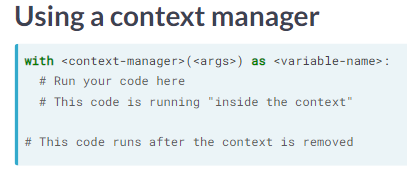


## Using context managers
The number of cats
You are working on a natural language processing project to determine what makes great writers so great. Your current hypothesis is that great writers talk about cats a lot. To prove it, you want to count the number of times the word "cat" appears in "Alice's Adventures in Wonderland" by Lewis Carroll. You have already downloaded a text file, alice.txt, with the entire contents of this great book.

In [1]:
# Open "alice.txt" and assign the file to "file"
with open('alice.txt') as file:
  text = file.read()

n = 0
for word in text.split():
  if word.lower() in ['cat', 'cats']:
    n += 1

print('Lewis Carroll uses the word "cat" {} times'.format(n))

FileNotFoundError: [Errno 2] No such file or directory: 'alice.txt'

### The speed of cats
You're working on a new web service that processes Instagram feeds to identify which pictures contain cats (don't ask why -- it's the internet). The code that processes the data is slower than you would like it to be, so you are working on tuning it up to run faster. Given an image, image, you have two functions that can process it:

- process_with_numpy(image)
- process_with_pytorch(image)
Your colleague wrote a context manager, timer(), that will print out how long the code inside the context block takes to run. She is suggesting you use it to see which of the two options is faster. Time each function to determine which one to use in your web service.

In [2]:
image = get_image_from_instagram()

# Time how long process_with_numpy(image) takes to run
with timer():
  print('Numpy version')
  process_with_numpy(image)

# Time how long process_with_pytorch(image) takes to run
with timer():
  print('Pytorch version')
  process_with_pytorch(image)

NameError: name 'get_image_from_instagram' is not defined

## Writing context managers
Two ways to write 
- functions
- class
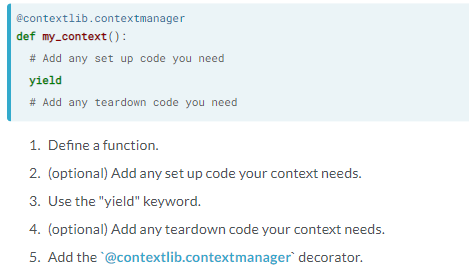


### The timer() context manager
A colleague of yours is working on a web service that processes Instagram photos. Customers are complaining that the service takes too long to identify whether or not an image has a cat in it, so your colleague has come to you for help. You decide to write a context manager that they can use to time how long their functions take to run.

- Remember that context managers use yield to return control to the context.
- timer() does not return a specific value when it yields control.

In [7]:
import contextlib
import time
# Add a decorator that will make timer() a context manager
@contextlib.contextmanager
def timer():
  """Time the execution of a context block.

  Yields:
    None
  """
  start = time.time()
  # Send control back to the context block
  yield None
  end = time.time()
  print('Elapsed: {:.2f}s'.format(end - start))
with timer():
  print('This should take approximately 0.25 seconds')
  time.sleep(0.25)

This should take approximately 0.25 seconds
Elapsed: 0.25s


### A read-only open() context manager
You have a bunch of data files for your next deep learning project that took you months to collect and clean. It would be terrible if you accidentally overwrote one of those files when trying to read it in for training, so you decide to create a read-only version of the open() context manager to use in your project.

The regular open() context manager:

takes a filename and a mode ('r' for read, 'w' for write, or 'a' for append)
opens the file for reading, writing, or appending
sends control back to the context, along with a reference to the file
waits for the context to finish
and then closes the file before exiting
Your context manager will do the same thing, except it will only take the filename as an argument and it will only open the file for reading.

In [9]:
@contextlib.contextmanager
def open_read_only(filename):
  """Open a file in read-only mode.

  Args:
    filename (str): The location of the file to read

  Yields:
    file object
  """
  read_only_file = open(filename, mode='r')
  # Yield read_only_file so it can be assigned to my_file
  yield read_only_file
  # Close read_only_file
  read_only_file.close()

with open_read_only('data/data.txt') as my_file:
  print(my_file.read())

## Advanced topics
- nested with statements are okay
- error can be handeld with try-except-finally statement 
```python 
def context_mangr():
    
    try:
        yield
    finally:
        close
```

### Scraping the NASDAQ
Training deep neural nets is expensive! You might as well invest in NVIDIA stock since you're spending so much on GPUs. To pick the best time to invest, you are going to collect and analyze some data on how their stock is doing. The context manager stock('NVDA') will connect to the NASDAQ and return an object that you can use to get the latest price by calling its .price() method.

You want to connect to stock('NVDA') and record 10 timesteps of price data by writing it to the file NVDA.txt.

In [10]:
# Use the "stock('NVDA')" context manager
# and assign the result to the variable "nvda"
with stock('NVDA') as nvda:
  # Open "NVDA.txt" for writing as f_out
  with open('NVDA.txt', 'w') as f_out:
    for i in range(10):
      value = nvda.price()
      print('Logging ${:.2f} for NVDA'.format(value))
      f_out.write('{:.2f}\n'.format(value))

NameError: name 'stock' is not defined

### Changing the working directory
You are using an open-source library that lets you train deep neural networks on your data. Unfortunately, during training, this library writes out checkpoint models (i.e., models that have been trained on a portion of the data) to the current working directory. You find that behavior frustrating because you don't want to have to launch the script from the directory where the models will be saved.

You decide that one way to fix this is to write a context manager that changes the current working directory, lets you build your models, and then resets the working directory to its original location. You'll want to be sure that any errors that occur during model training don't prevent you from resetting the working directory to its original location.

In [11]:
def in_dir(directory):
  """Change current working directory to `directory`,
  allow the user to run some code, and change back.

  Args:
    directory (str): The path to a directory to work in.
  """
  current_dir = os.getcwd()
  os.chdir(directory)

  # Add code that lets you handle errors
  try:
    yield
  # Ensure the directory is reset,
  # whether there was an error or not
  finally:
    os.chdir(current_dir)